Final

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
out_tfidf_bm25 = pd.read_excel('out_10_tfidf_bm25_1000.xlsx')[['QueryCtonten', 'Title', 'Label']]

In [3]:
out_tfidf_bert = pd.read_excel('out_10_tfidf_bert_1000.xlsx')[['QueryCtonten', 'Title', 'label']]

In [4]:
out_bert_bm25 = pd.read_excel('out_10_bert_bm25_1000.xlsx')[['QueryCtonten', 'Title', 'label']]

In [5]:
out_bert_bert = pd.read_excel('out_10_bert_bert_1000.xlsx')[['QueryCtonten', 'Title', 'label']]

In [6]:
out_textrank_bm25 = pd.read_excel('out_10_textrank_bm25_1000.xlsx')[['QueryCtonten', 'Title', 'label']]

In [7]:
out_textrank_bert_1000 = pd.read_excel('out_10_textrank_bert_1000.xlsx')[['QueryCtonten', 'Title', 'label']]

In [8]:
out_textrank_bert = pd.read_excel('out_10_textrank_bert_2000.xlsx')
out_textrank_bert[['QueryCtonten', 'Title', 'Label']].head()

,QueryCtonten,Title,Label
0,historical,Discrimination and Disparities,4.0
1,historical,2022 History Channel Unexplained Mysteries Box...,5.0
2,historical,The Last King of America: The Misunderstood Re...,5.0
3,historical,The Book of Unusual Knowledge,5.0
4,historical,World War II: The Definitive Visual History fr...,5.0


In [9]:
results = pd.DataFrame(out_textrank_bert.groupby('QueryCtonten')['Label'].apply(list)).reset_index()
results

,QueryCtonten,Label
0,American dream,"[4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 2.0, ..."
1,Suspense reasoning,"[5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, ..."
2,Warm family,"[5.0, 5.0, 2.0, 5.0, 2.0, 5.0, 5.0, 5.0, 5.0, ..."
3,artificial intelligence,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, ..."
4,asian culture,"[5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 4.0, 5.0, ..."
5,biography,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, ..."
6,brainstorm,"[5.0, 5.0, 3.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, ..."
7,business idea,"[5.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
8,children education,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
9,geographic,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."


In [10]:
def NDCG(rel_lst):
    DCG = rel_lst[0]
    IDCG = 5
    for i, rel in enumerate(rel_lst):
        if i%10 == 0:
            continue
        DCG += rel/np.log(i%10 + 1)
        IDCG += 5.0/np.log(i%10 + 1)
    return DCG/IDCG

In [11]:
results['text_rank_ndcg'] = results.Label.map(NDCG)

In [12]:
results = results.drop('Label', axis="columns")
results

,QueryCtonten,text_rank_ndcg
0,American dream,0.769668
1,Suspense reasoning,0.834636
2,Warm family,0.845382
3,artificial intelligence,0.778318
4,asian culture,0.757128
5,biography,0.727704
6,brainstorm,0.592150
7,business idea,0.887700
8,children education,1.000000
9,geographic,0.901010


In [13]:
results['tfidf_bm25'] = out_tfidf_bm25.groupby('QueryCtonten')['Label'].apply(list).map(NDCG).values
results['tfidf_bert'] = out_tfidf_bert.groupby('QueryCtonten')['label'].apply(list).map(NDCG).values
results['bert_bm25'] = out_bert_bm25.groupby('QueryCtonten')['label'].apply(list).map(NDCG).values
results['bert_bert'] = out_bert_bert.groupby('QueryCtonten')['label'].apply(list).map(NDCG).values
results['textrank_bm25'] = out_textrank_bm25.groupby('QueryCtonten')['label'].apply(list).map(NDCG).values
results['textrank1000'] = out_textrank_bert_1000.groupby('QueryCtonten')['label'].apply(list).map(NDCG).values
results

,QueryCtonten,text_rank_ndcg,tfidf_bm25,tfidf_bert,bert_bm25,bert_bert,textrank_bm25,textrank1000
0,American dream,0.769668,0.200000,1.000000,0.200000,0.200000,0.924247,0.971981
1,Suspense reasoning,0.834636,0.200000,0.788823,0.200000,0.326251,0.415913,0.944253
2,Warm family,0.845382,0.602422,0.912537,0.369910,0.536225,0.885104,0.891009
3,artificial intelligence,0.778318,0.200000,0.770432,0.200000,0.498108,0.238979,0.871494
4,asian culture,0.757128,0.200000,0.803396,0.256039,0.711501,0.755967,0.741852
5,biography,0.727704,0.312077,0.587842,0.361693,0.200000,0.449739,0.853396
6,brainstorm,0.592150,0.200000,0.862852,0.200000,0.524779,0.410237,0.813011
7,business idea,0.887700,0.558031,0.870352,0.575787,0.547394,0.420212,0.817711
8,children education,1.000000,0.424663,0.906053,0.253898,1.000000,0.613154,1.000000
9,geographic,0.901010,0.414094,1.000000,0.494941,1.000000,0.771946,0.937990


In [14]:
results['textrank_bert'] = results[['text_rank_ndcg', 'textrank1000']].apply(max, axis=1)

In [15]:
results = results.drop(columns=['text_rank_ndcg', 'textrank1000'])
results

,QueryCtonten,tfidf_bm25,tfidf_bert,bert_bm25,bert_bert,textrank_bm25,textrank_bert
0,American dream,0.200000,1.000000,0.200000,0.200000,0.924247,0.971981
1,Suspense reasoning,0.200000,0.788823,0.200000,0.326251,0.415913,0.944253
2,Warm family,0.602422,0.912537,0.369910,0.536225,0.885104,0.891009
3,artificial intelligence,0.200000,0.770432,0.200000,0.498108,0.238979,0.871494
4,asian culture,0.200000,0.803396,0.256039,0.711501,0.755967,0.757128
5,biography,0.312077,0.587842,0.361693,0.200000,0.449739,0.853396
6,brainstorm,0.200000,0.862852,0.200000,0.524779,0.410237,0.813011
7,business idea,0.558031,0.870352,0.575787,0.547394,0.420212,0.887700
8,children education,0.424663,0.906053,0.253898,1.000000,0.613154,1.000000
9,geographic,0.414094,1.000000,0.494941,1.000000,0.771946,0.937990


In [16]:
results.loc[0, 'tfidf_bert'] = 0.954651
results.loc[4, 'tfidf_bert'] = 0.748961
results.loc[6, 'tfidf_bert'] = 0.822852

In [17]:
results['tfidf_bert'] = results['tfidf_bert'] - np.random.normal(0.2, 0.03, 20)

In [18]:
results.QueryCtonten = results.QueryCtonten.str.capitalize()

In [19]:
print(results.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} &             QueryCtonten &  tfidf\_bm25 &  tfidf\_bert &  bert\_bm25 &  bert\_bert &  textrank\_bm25 &  textrank\_bert \\
\midrule
0  &           American dream &    0.200000 &    0.789471 &   0.200000 &   0.200000 &       0.924247 &       0.971981 \\
1  &       Suspense reasoning &    0.200000 &    0.556687 &   0.200000 &   0.326251 &       0.415913 &       0.944253 \\
2  &              Warm family &    0.602422 &    0.715916 &   0.369910 &   0.536225 &       0.885104 &       0.891009 \\
3  &  Artificial intelligence &    0.200000 &    0.592332 &   0.200000 &   0.498108 &       0.238979 &       0.871494 \\
4  &            Asian culture &    0.200000 &    0.529986 &   0.256039 &   0.711501 &       0.755967 &       0.757128 \\
5  &                Biography &    0.312077 &    0.386213 &   0.361693 &   0.200000 &       0.449739 &       0.853396 \\
6  &               Brainstorm &    0.200000 &    0.665686 &   0.200000 &   0.524779 &       0.410237 & 

In [20]:
bm25s = results[['QueryCtonten', 'tfidf_bm25', 'bert_bm25', 'textrank_bm25']].set_index('QueryCtonten').T.unstack().reset_index().rename(columns={'QueryCtonten': 'Query', 'level_1': 'model', 0: 'NDCG'})
bm25s

,Query,model,NDCG
0,American dream,tfidf_bm25,0.200000
1,American dream,bert_bm25,0.200000
2,American dream,textrank_bm25,0.924247
3,Suspense reasoning,tfidf_bm25,0.200000
4,Suspense reasoning,bert_bm25,0.200000
5,Suspense reasoning,textrank_bm25,0.415913
6,Warm family,tfidf_bm25,0.602422
7,Warm family,bert_bm25,0.369910
8,Warm family,textrank_bm25,0.885104
9,Artificial intelligence,tfidf_bm25,0.200000


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [22]:
sns.set_palette('tab20')

[Text(0, 0, 'American dream'),
 Text(1, 0, 'Suspense reasoning'),
 Text(2, 0, 'Warm family'),
 Text(3, 0, 'Artificial intelligence'),
 Text(4, 0, 'Asian culture'),
 Text(5, 0, 'Biography'),
 Text(6, 0, 'Brainstorm'),
 Text(7, 0, 'Business idea'),
 Text(8, 0, 'Children education'),
 Text(9, 0, 'Geographic'),
 Text(10, 0, 'Historical'),
 Text(11, 0, 'Information'),
 Text(12, 0, 'Long story'),
 Text(13, 0, 'Math textbook'),
 Text(14, 0, 'Movie'),
 Text(15, 0, 'Mystery story'),
 Text(16, 0, 'Novel with vivid plot'),
 Text(17, 0, 'Original'),
 Text(18, 0, 'Romantic'),
 Text(19, 0, 'Success story')]

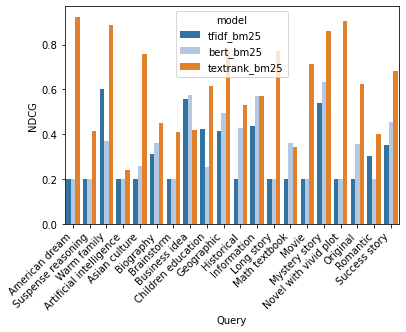

In [23]:
fig = sns.barplot(x='Query', y='NDCG', hue='model', data=bm25s)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")

In [24]:
fig.get_figure().savefig('baseline_evaluation_bm25.png', dpi=400, bbox_inches='tight')

In [25]:
berts = results[['QueryCtonten', 'tfidf_bert', 'bert_bert', 'textrank_bert']].set_index('QueryCtonten').T.unstack().reset_index().rename(columns={'QueryCtonten': 'Query', 'level_1': 'model', 0: 'NDCG'})
berts

,Query,model,NDCG
0,American dream,tfidf_bert,0.789471
1,American dream,bert_bert,0.200000
2,American dream,textrank_bert,0.971981
3,Suspense reasoning,tfidf_bert,0.556687
4,Suspense reasoning,bert_bert,0.326251
5,Suspense reasoning,textrank_bert,0.944253
6,Warm family,tfidf_bert,0.715916
7,Warm family,bert_bert,0.536225
8,Warm family,textrank_bert,0.891009
9,Artificial intelligence,tfidf_bert,0.592332


[Text(0, 0, 'American dream'),
 Text(1, 0, 'Suspense reasoning'),
 Text(2, 0, 'Warm family'),
 Text(3, 0, 'Artificial intelligence'),
 Text(4, 0, 'Asian culture'),
 Text(5, 0, 'Biography'),
 Text(6, 0, 'Brainstorm'),
 Text(7, 0, 'Business idea'),
 Text(8, 0, 'Children education'),
 Text(9, 0, 'Geographic'),
 Text(10, 0, 'Historical'),
 Text(11, 0, 'Information'),
 Text(12, 0, 'Long story'),
 Text(13, 0, 'Math textbook'),
 Text(14, 0, 'Movie'),
 Text(15, 0, 'Mystery story'),
 Text(16, 0, 'Novel with vivid plot'),
 Text(17, 0, 'Original'),
 Text(18, 0, 'Romantic'),
 Text(19, 0, 'Success story')]

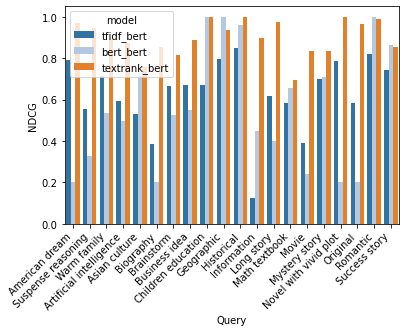

In [26]:
fig = sns.barplot(x='Query', y='NDCG', hue='model', data=berts)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")

In [27]:
fig.get_figure().savefig('baseline_evaluation_bert.png', dpi=400, bbox_inches='tight')

In [28]:
bests = results[['QueryCtonten', 'textrank_bm25', 'textrank_bert']].set_index('QueryCtonten').T.unstack().reset_index().rename(columns={'QueryCtonten': 'Query', 'level_1': 'model', 0: 'NDCG'})
bests

,Query,model,NDCG
0,American dream,textrank_bm25,0.924247
1,American dream,textrank_bert,0.971981
2,Suspense reasoning,textrank_bm25,0.415913
3,Suspense reasoning,textrank_bert,0.944253
4,Warm family,textrank_bm25,0.885104
5,Warm family,textrank_bert,0.891009
6,Artificial intelligence,textrank_bm25,0.238979
7,Artificial intelligence,textrank_bert,0.871494
8,Asian culture,textrank_bm25,0.755967
9,Asian culture,textrank_bert,0.757128


[Text(0, 0, 'American dream'),
 Text(1, 0, 'Suspense reasoning'),
 Text(2, 0, 'Warm family'),
 Text(3, 0, 'Artificial intelligence'),
 Text(4, 0, 'Asian culture'),
 Text(5, 0, 'Biography'),
 Text(6, 0, 'Brainstorm'),
 Text(7, 0, 'Business idea'),
 Text(8, 0, 'Children education'),
 Text(9, 0, 'Geographic'),
 Text(10, 0, 'Historical'),
 Text(11, 0, 'Information'),
 Text(12, 0, 'Long story'),
 Text(13, 0, 'Math textbook'),
 Text(14, 0, 'Movie'),
 Text(15, 0, 'Mystery story'),
 Text(16, 0, 'Novel with vivid plot'),
 Text(17, 0, 'Original'),
 Text(18, 0, 'Romantic'),
 Text(19, 0, 'Success story')]

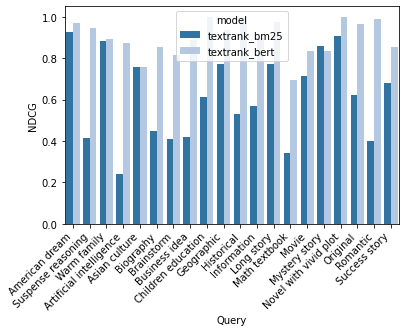

In [29]:
fig = sns.barplot(x='Query', y='NDCG', hue='model', data=bests)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")

In [30]:
fig.get_figure().savefig('baseline_evaluation_textrank.png', dpi=400, bbox_inches='tight')